In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import minmax_scale

## Mandatory part

### 1. importing the data

In [2]:
# import the data
data = pd.read_csv('C:/Users/dengd/Documents/GitHub/IronDuo/Class_Materials/Case_Studies/Customer_Analysis_Case_Study/Data/Data_Marketing_Customer_Analysis_Round3.csv')
def drop_columns(data):
    data.drop(columns=['effective_to_date'], inplace=True)
    return data
drop_columns(data)

region  customer_lifetime_value response  coverage education  \
0          central                     4809       no     basic   college   
1      west region                     2228       no     basic   college   
2             east                    14947       no     basic  bachelor   
3       north west                    22332      yes  extended   college   
4       north west                     9025       no   premium  bachelor   
...            ...                      ...      ...       ...       ...   
10684      central                    15563       no   premium  bachelor   
10685   north west                     5259       no     basic   college   
10686      central                    23893       no  extended  bachelor   
10687  west region                    11971       no   premium   college   
10688      central                     6857       no     basic  bachelor   

      month employment_status gender  income location_code  ...  \
0       feb          employed      m   48029      suburban  ...   
1       jan        unemployed      f   92260      suburban  ...   
2       feb          employed      m   22139      suburban  ...   
3       jan          employed      m   49078      suburban  ...   
4       jan     medical leave      f   23675      suburban  ...   
...     ...               ...    ...     ...           ...  ...   
10684   jan        unemployed      f   61541      suburban  ...   
10685   jan          employed      f   61146         urban  ...   
10686   feb          employed      f   39837         rural  ...   
10687   feb          employed      f   64195         urban  ...   
10688   jan        unemployed      m   68942      suburban  ...   

      months_since_policy_inception  number_of_open_complaints  \
0                                52                          0   
1                                26                          0   
2                                31                          0   
3                                 3                          0   
4                                31                          0   
...                             ...                        ...   
10684                            40                          0   
10685                            68                          0   
10686                            63                          0   
10687                            27                          4   
10688                             1                          0   

       number_of_policies     policy_type        policy  renew_offer_type  \
0                       9  corporate auto  corporate l3            offer3   
1                       1   personal auto   personal l3            offer4   
2                       2   personal auto   personal l3            offer3   
3                       2  corporate auto  corporate l3            offer2   
4                       7   personal auto   personal l2            offer1   
...                   ...             ...           ...               ...   
10684                   7   personal auto   personal l1            offer3   
10685                   6   personal auto   personal l3            offer2   
10686                   2  corporate auto  corporate l3            offer1   
10687                   6   personal auto   personal l1            offer1   
10688                   3   personal auto   personal l1            offer4   

      sales_channel total_claim_amount  vehicle_class vehicle_size  
0             agent                292  four-door car      medsize  
1       call center                744  four-door car      medsize  
2       call center                480            suv      medsize  
3            branch                484  four-door car      medsize  
4            branch                707  four-door car      medsize  
...             ...                ...            ...          ...  
10684           web               1214     luxury car      medsize  
10685        branch     

### 2. getting numrical columns

In [3]:
numericals = data.select_dtypes(include=[np.number])

### 3. getting categorical columns

In [4]:
categoricals = data.select_dtypes(include=[np.object])

C:\Users\dengd\AppData\Local\Temp\ipykernel_15192\2433340411.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(include=[np.object])


### 4. check if there are highly correlated features and drop them if there are any.

<AxesSubplot:>

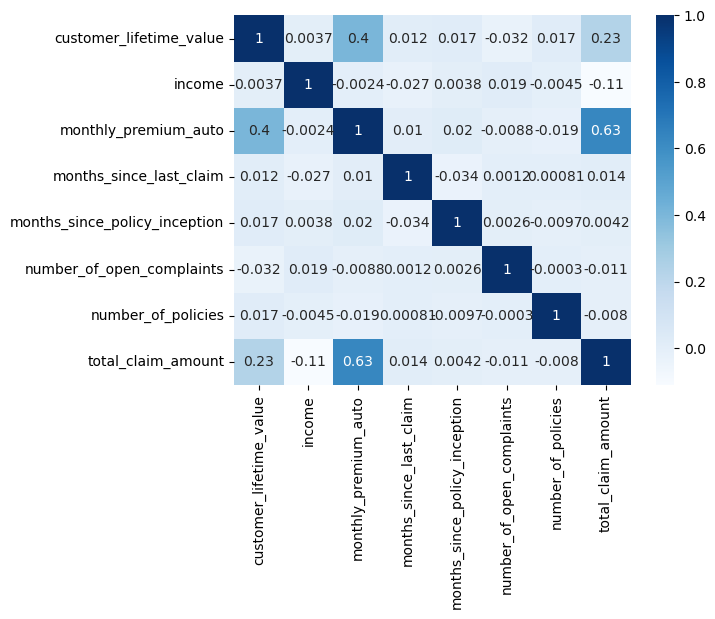

In [5]:
corr_matrix = numericals.corr()
sns.heatmap(corr_matrix, annot=True, cmap= 'Blues')

### 5. one Hot Encoding

In [6]:
pd.get_dummies(categoricals, sparse = True)

region_central  region_east  region_north west  region_west region  \
0                   1            0                  0                   0   
1                   0            0                  0                   1   
2                   0            1                  0                   0   
3                   0            0                  1                   0   
4                   0            0                  1                   0   
...               ...          ...                ...                 ...   
10684               1            0                  0                   0   
10685               0            0                  1                   0   
10686               1            0                  0                   0   
10687               0            0                  0                   1   
10688               1            0                  0                   0   

       response_no  response_yes  coverage_basic  coverage_extended  \
0                1             0               1                  0   
1                1             0               1                  0   
2                1             0               1                  0   
3                0             1               0                  1   
4                1             0               0                  0   
...            ...           ...             ...                ...   
10684            1             0               0                  0   
10685            1             0               1                  0   
10686            1             0               0                  1   
10687            1             0               0                  0   
10688            1             0               1                  0   

       coverage_premium  education_bachelor  ...  sales_channel_web  \
0                     0                   0  ...                  0   
1                     0                   0  ...                  0   
2                     0                   1  ...                  0   
3                     0                   0  ...                  0   
4                     1                   1  ...                  0   
...                 ...                 ...  ...                ...   
10684                 1                   1  ...                  1   
10685                 0                   0  ...                  0   
10686                 0                   1  ...                  1   
10687                 1                   0  ...                  0   
10688                 0                   1  ...                  1   

       vehicle_class_four-door car  vehicle_class_luxury car  \
0                                1                         0   
1                                1                         0   
2                                0                         0   
3                                1                         0   
4                                1                         0   
...                            ...                       ...   
10684                            0                         1   
10685                            1                         0   
10686                            0                         0   
10687                            0                         0   
10688                            0                         0   

       vehicle_class_luxury suv  vehicle_class_sports car  vehicle_class_suv  \
0                             0                         0                  0   
1                             0                         0                  0   
2                             0                         0                  1   
3                             0                         0                  0   
4                             0                         0                  0   
...                         ...                       ...                ...   
10684                         0                

### 6. label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()

categoricals = categoricals.apply(lambda col: LabelEncoder.fit_transform(col))

categoricals

region  response  coverage  education  month  employment_status  \
0           0         0         0          1      0                  1   
1           3         0         0          1      1                  4   
2           1         0         0          0      0                  1   
3           2         1         1          1      1                  1   
4           2         0         2          0      1                  2   
...       ...       ...       ...        ...    ...                ...   
10684       0         0         2          0      1                  4   
10685       2         0         0          1      1                  1   
10686       0         0         1          0      0                  1   
10687       3         0         2          1      0                  1   
10688       0         0         0          0      1                  4   

       gender  location_code  marital_status  policy_type  policy  \
0           1              1               1            0       2   
1           0              1               2            1       5   
2           1              1               2            1       5   
3           1              1               2            0       2   
4           0              1               1            1       4   
...       ...            ...             ...          ...     ...   
10684       0              1               1            1       3   
10685       0              2               1            1       5   
10686       0              0               1            0       2   
10687       0              2               0            1       3   
10688       1              1               2            1       3   

       renew_offer_type  sales_channel  vehicle_class  vehicle_size  
0                     2              0              0             1  
1                     3              2              0             1  
2                     2              2              4             1  
3                     1              1              0             1  
4                     0              1              0             1  
...                 ...            ...            ...           ...  
10684                 2              3              1             1  
10685                 1              1              0             1  
10686                 0              3              2             1  
10687                 0              1              4             1  
10688                 3              3              4             1  

[10689 rows x 15 columns]

## Optional Task

### 1.varA

In [26]:
# selecting 'income' and change the column type into array
varA  = data['income'].values
varA

array([48029, 92260, 22139, ..., 39837, 64195, 68942], dtype=int64)

In [30]:
# 1. Use minmax transform to bring varA's values into the range [0,1].
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
varA_scaled = pd.DataFrame(scaler.fit_transform(varA.reshape(-1, 1)))


0
0      0.422396
1      0.914158
2      0.134550
3      0.434059
4      0.151628
...         ...
10684  0.572623
10685  0.568231
10686  0.331317
10687  0.602130
10688  0.654907

[10689 rows x 1 columns]

### 2. Check that varA has been rescaled using a distplot or a histagram

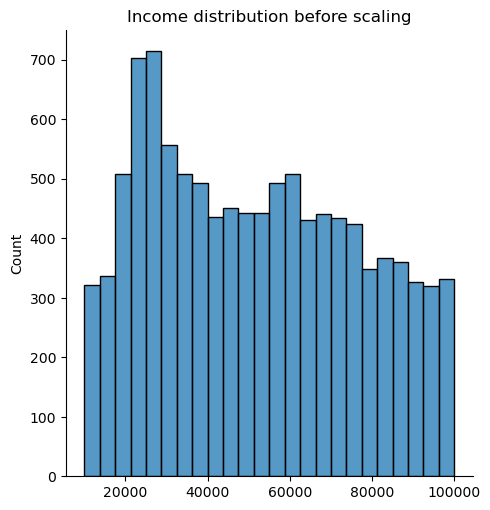

In [54]:
# before scaling
sns.displot(varA)  
plt.title("Income distribution before scaling")
plt.show()

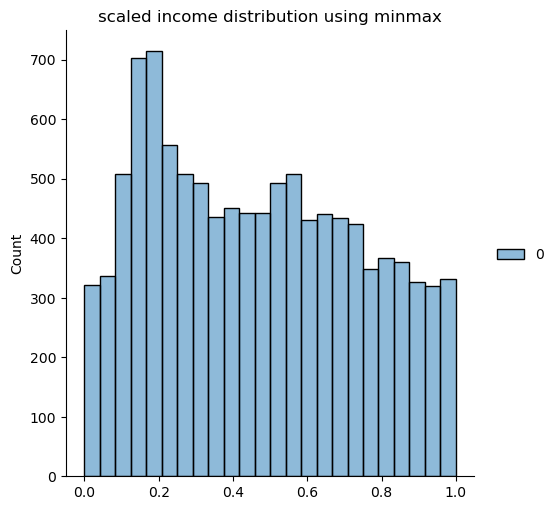

In [55]:
# after scaling
sns.displot(varA_scaled)  
plt.title("scaled income distribution using minmax")
plt.show()

### 2. varB

In [33]:
varB  = data['customer_lifetime_value'].values
varB

array([ 4809,  2228, 14947, ..., 23893, 11971,  6857], dtype=int64)

#### StandardScalar

In [61]:
# 1. StandardScalar _method1
from sklearn.preprocessing import StandardScaler
varB = varB.reshape(-1, 1)

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(varB)

# Transform the data
varB_s = scaler.transform(varB)
varB_s 

array([[-0.46572586],
       [-0.84102197],
       [ 1.00841284],
       ...,
       [ 2.3092261 ],
       [ 0.57568087],
       [-0.16793181]])

In [ ]:
# 1. StandardScalar_method2
varB  = data[['customer_lifetime_value']] # [[]]change it into dataframe
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaled = scaler.fit_transform(varB)
scaled 

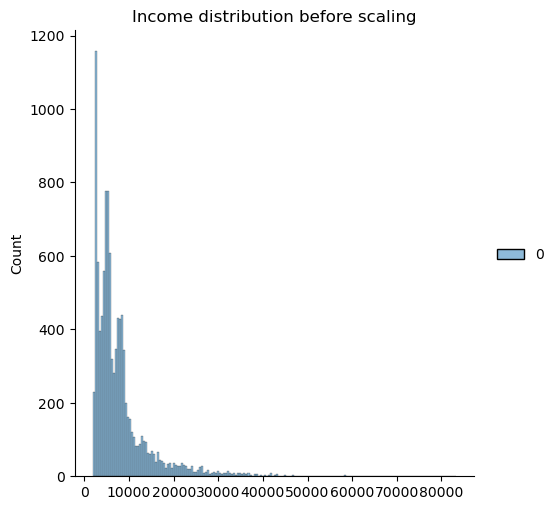

In [63]:
# before scaling 
sns.displot(varB)  
plt.title("Income distribution before scaling")
plt.show()

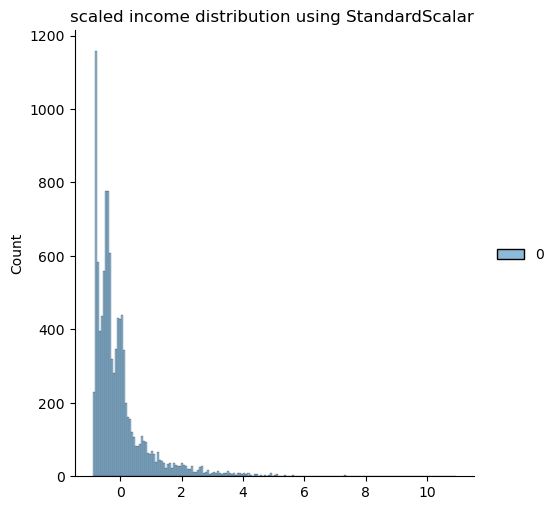

In [62]:
# after scaling using StandardScalar
sns.displot(varB_s)  
plt.title("scaled income distribution using StandardScalar ")
plt.show()

In [69]:
# 2. PowerTransform
from sklearn.preprocessing import PowerTransformer

# reshapes the 1D array varB into a 2D array with shape (n, 1), where n is the number of samples in varB
varB_p = varB.reshape(-1, 1)

# Create an instance of StandardScaler
scaler_p = PowerTransformer()

# computes the parameters needed for the power transform.
scaler_p.fit(varB_p)

# applies the PowerTransform to the data varB_p and stores the result in the variable varB_scaled_p.
varB_scaled_p = scaler_p.transform(varB_p)
varB_scaled_p

array([[-0.33614341],
       [-1.86720472],
       [ 1.2922699 ],
       ...,
       [ 1.79973101],
       [ 1.0217405 ],
       [ 0.24359374]])

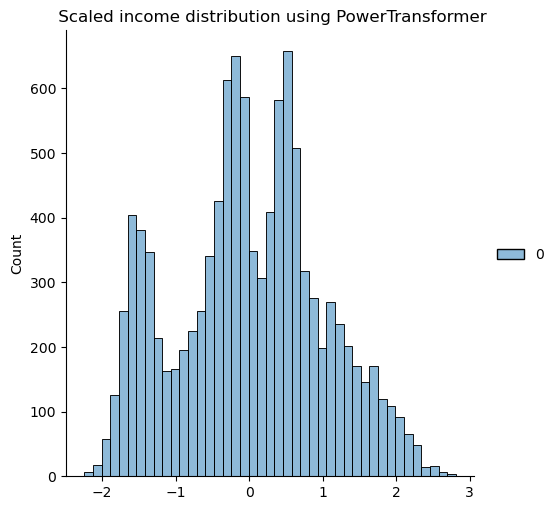

In [70]:
# after scaling using PowerTransform
sns.displot(varB_scaled_p)  
plt.title(" Scaled income distribution using PowerTransformer") 
plt.show()

In [60]:
# check mean after scaling
mean_varB_scaled = np.mean(varB_scaled)
mean_varB_scaled 

# check varicace after scaling
var_varB_scaled = np.std(varB_scaled )
var_varB_scaled 

1.0